# Exploratory Data Analysis (EDA)

In [86]:
#Import the Libraries : pandas , numpy, seaborn, matplotlib.pyplot , scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st


# Import warnings library and set it to ignore[so as to ignore warnings]
import warnings
warnings.filterwarnings('ignore')
#Display all the columns of the Dataframe
pd.pandas.set_option('display.max_columns',None)
#Display all Numbers of float datatype as numbers with 2 decimal places 
pd.options.display.float_format = "{:.2f}".format

#from SciKit Learn import Models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score


In [87]:
df = pd.read_csv('data.csv')

In [88]:
# Verify that result of SQL query is stored in the DataFrame and Print the top 20 records
df.head(20)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.00,13 October 2014,221900.00,3.00,1.00,1.00,0.00,0.00,fair,10.00,0.00,1955.00,0.00,98178.00,47.51,-122.26,1340.00,5650.00
1,6774848.00,09 December 2014,538000.00,3.00,2.25,2.00,0.00,0.00,fair,7.00,400.00,1951.00,1991.00,98125.00,47.72,-122.32,1690.00,7639.00
2,6999329.00,25 February 2015,180000.00,2.00,1.00,1.00,0.00,0.00,fair,8.00,0.00,1933.00,0.00,98028.00,47.74,-122.23,2720.00,8062.00
3,7773052.00,09 December 2014,604000.00,4.00,3.00,1.00,0.00,0.00,excellent,6.00,910.00,1965.00,0.00,98136.00,47.52,-122.39,1360.00,5000.00
4,7760818.00,18 February 2015,510000.00,3.00,2.00,1.00,0.00,0.00,fair,6.00,0.00,1987.00,0.00,98074.00,47.62,-122.05,1800.00,7503.00
5,7659918.00,12 May 2014,1225000.00,4.00,4.50,1.00,0.00,0.00,fair,8.00,1530.00,2001.00,0.00,98053.00,47.66,-122.00,4760.00,101930.00
6,8057033.00,27 June 2014,257500.00,3.00,2.25,2.00,0.00,0.00,FAIR,7.00,0.00,1995.00,0.00,98003.00,47.31,-122.33,2238.00,6819.00
7,7249853.00,15 January 2015,291850.00,3.00,1.50,1.00,0.00,0.00,fair,7.00,0.00,1963.00,0.00,98198.00,47.41,-122.31,1650.00,9711.00
8,7906980.00,15 April 2015,229500.00,3.00,1.00,1.00,0.00,0.00,FAIR,7.00,730.00,1960.00,0.00,98146.00,47.51,-122.34,1780.00,8113.00
9,7605289.00,12 March 2015,323000.00,3.00,2.50,2.00,0.00,0.00,fair,7.00,0.00,2003.00,0.00,98038.00,47.37,-122.03,2390.00,7570.00


In [89]:
#display information : number of rows and columns, Column or  Feature name 
#the total memory usage, the data type of each column, and the number of non-Null elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21871 non-null  float64
 1   date              21925 non-null  object 
 2   price             21896 non-null  float64
 3   bedrooms          21905 non-null  float64
 4   bathrooms         21938 non-null  float64
 5   floors            21862 non-null  float64
 6   waterfront        21871 non-null  float64
 7   view              21908 non-null  float64
 8   condition         21890 non-null  object 
 9   review_score      21851 non-null  float64
 10  basement_size     21929 non-null  float64
 11  built             21853 non-null  float64
 12  renovation        21897 non-null  float64
 13  zipcode           21884 non-null  float64
 14  latitude          21903 non-null  float64
 15  longitude         21883 non-null  float64
 16  living_room_size  21912 non-null  float6

## Observation (from above two Displayed Tables ) that there are :
## a) 2 Object DataTypes ('condition' Column is Categorical and "date" is a Date-Time Variable but an    Object or String datatype and the last four digit is Year in YYYY format).We will convert that into int and then to float datatype 
## b) 16 Numerical DataTypes ( of which "id"'s value does not matter and 'built' and 'renovation' and actually Year which is a Time or Temporal Variable)
## c)Home Price or 'price' which is the Target Variable for prediction later , has only 21871 non-null values , hence we can safely drop all other values or null values from all rows from all features or variables.

# 1. Data Cleaning and Preparation

In [90]:
#We drop 'id' as it will not be used in the Analysis
df = df.drop('id',axis=1)

#we put in the df DataFrame only those values for all columns , for which 'price' Column has non-null or non-na values
#i.e. we execute on observation c) above
df = df[df['price'].notna()]

#get the unique vales of Column 'condition'
df['condition'].unique()

array(['fair', 'excellent', 'FAIR', 'good', 'TERRIBLE', 'poor', nan,
       'GOOD', 'EXCELLENT', 'terrible', 'POOR'], dtype=object)

In [91]:
#convert all lower case in 'condition' column as fair = FAIR , same is true for others , except none , which we will 
#handle in the Data Prep stage
df['condition'] = [str(i).lower() for i in df['condition']]
# check the unique values 
df['condition'].unique()

array(['fair', 'excellent', 'good', 'terrible', 'poor', 'nan'],
      dtype=object)

In [92]:
#we replace the 'condition' of the house with numerical rating ['excellent', 'good','fair','poor','terrible','none'] 
#with [5,4,3,2,1,0]
df['condition'] = df['condition'].replace(to_replace =['excellent', 'good','fair','poor','terrible','none'],  
                            value =[5.0,4.0,3.0,2.0,1.0,0.0]) 

In [93]:
#convert string or object number to numerical or int datatype
df['condition']=pd.to_numeric(df['condition'], errors='coerce').fillna(0, downcast='infer')

#convert to float datatype
df['condition']=df['condition'].astype(float)
# check the unique values in the DataFrame Column 'condition'
df['condition'].unique()

array([3., 5., 4., 1., 2., 0.])

In [94]:
#get the last 4 characters ie Year (YYYY) of the 'date' Column 
df['date']=df['date'].str[-4:]

#get the unique values of date column
df['date'].unique()

array(['2014', '2015', nan], dtype=object)

In [95]:
#convert string or object number to numerical or int datatype
df['date']=pd.to_numeric(df['date'], errors='coerce').fillna(0, downcast='infer')

#convert to float datatype
df['date']=df['date'].astype(float)

#get the unique values of date column
df['date'].unique()

array([2014., 2015.,    0.])

In [96]:
#get the unique values of 'built' or Year Built column
df['built'].unique()


array([1955., 1951., 1933., 1965., 1987., 2001., 1995., 1963., 1960.,
       2003., 1942., 1977., 1900., 1979., 1994., 1916., 1921., 1969.,
       1947., 1968., 1985., 1941., 1915., 1909., 1948., 2005., 1929.,
       1981., 1930., 1904., 1996., 2000., 1984., 2014., 1922., 1959.,
       1966.,   nan, 1953., 1950., 1927., 2008., 1991., 1954., 1925.,
       1989., 1973., 1972., 1986., 1956., 2002., 1992., 1964., 1952.,
       1961., 2006., 1988., 1939., 1946., 1967., 1975., 1910., 1983.,
       1978., 1905., 1971., 2010., 1924., 1990., 1914., 1926., 2004.,
       1962., 1923., 2007., 1976., 1949., 1999., 1980., 1901., 1993.,
       1920., 1997., 1943., 1957., 1940., 1918., 1928., 1974., 1911.,
       1936., 1937., 1982., 1908., 1931., 1998., 2013., 1907., 1958.,
       2012., 1912., 2011., 1917., 1932., 1944., 1902., 2009., 1903.,
       1970., 2015., 1934., 1938., 1913., 1919., 1906., 1945., 1935.])

In [97]:
# Number of unique 'built' values
len(df['built'].unique())

117

In [98]:
#get the unique values of 'renovation' or Renovation Year column
df['renovation'].unique()

array([   0., 1991., 2002.,   nan, 2010., 1999., 1992., 2013., 1994.,
       2005., 2008., 2003., 1984., 1954., 2014., 2011., 1974., 1945.,
       1990., 1988., 1957., 1977., 1981., 1995., 2000., 1998., 1970.,
       1989., 2004., 1986., 2009., 2007., 1987., 1973., 2006., 1985.,
       2001., 1980., 1971., 1979., 1997., 1969., 1948., 1983., 2015.,
       1978., 1968., 2012., 1963., 1951., 1993., 1962., 1996., 1972.,
       1953., 1955., 1950., 1956., 1982., 1940., 1976., 1946., 1975.,
       1958., 1964., 1959., 1960., 1967., 1965., 1934., 1944.])

In [99]:
# Number of unique 'renovation' values
len(df['renovation'].unique())

71

## Observation 1a)
We observe from the Above 3 Temporal Variables : Date or Date of Sale , Year Built and Renovation Year Unique Values that Date has only two years (viz. 2014 and 2015) while Year Built and Renovation Year has a wide range since early 1900s to 2000s .

In [100]:
#display information : number of rows and columns, Column or  Feature name 
#the total memory usage, the data type of each column, and the number of non-Null elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21896 entries, 0 to 23153
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              21896 non-null  float64
 1   price             21896 non-null  float64
 2   bedrooms          21308 non-null  float64
 3   bathrooms         21326 non-null  float64
 4   floors            21279 non-null  float64
 5   waterfront        21274 non-null  float64
 6   view              21313 non-null  float64
 7   condition         21896 non-null  float64
 8   review_score      20669 non-null  float64
 9   basement_size     21337 non-null  float64
 10  built             21283 non-null  float64
 11  renovation        21313 non-null  float64
 12  zipcode           21313 non-null  float64
 13  latitude          21309 non-null  float64
 14  longitude         21321 non-null  float64
 15  living_room_size  21294 non-null  float64
 16  lot_size          21313 non-null  float6

In [101]:
#descriptive statistics summary of all Numerical Features or Variables .
df.describe()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
count,21896.00,21896.00,21308.00,21326.00,21279.00,21274.00,21313.00,21896.00,20669.00,21337.00,21283.00,21313.00,21313.00,21309.00,21321.00,21294.00,21313.00
mean,1961.24,540653.80,3.37,2.11,1.49,0.01,0.23,3.32,7.66,290.97,1971.02,84.93,98077.92,47.56,-122.21,1986.02,12809.11
std,322.66,369404.74,0.91,0.77,0.54,0.09,0.76,0.85,1.18,441.94,29.35,402.88,53.48,0.14,0.14,685.21,27385.09
min,0.00,75000.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2014.00,321000.00,3.00,1.50,1.00,0.00,0.00,3.00,7.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,2014.00,450000.00,3.00,2.25,1.50,0.00,0.00,3.00,7.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,2015.00,645000.00,4.00,2.50,2.00,0.00,0.00,4.00,8.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10091.00
max,2015.00,7700000.00,11.00,8.00,3.50,1.00,4.00,5.00,13.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


# Observation 1b)
We Observe from the above table in the House Price/"price" Column or Variable that the max value is 7.7 million and minimum value is 75k . Let's see if they are Normally Distributed

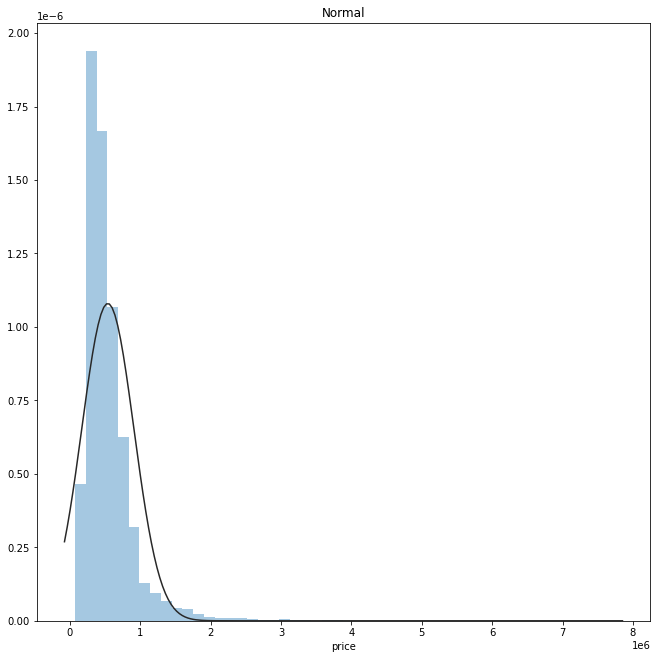

In [102]:
#Plot normal distribution of House Price 
y = df['price']
plt.figure(figsize=(11,11)); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

In [103]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.102171
Kurtosis: 35.801755


# Observation 1c)
Skewness is ameasure of Symmetry or lack thereof of the Distribution . We see from the above plot , that "House Price" doesn't follow normal distribution and has high skewness, deviates from the normal distribution and shows peakedness or high Kurtosis.So we need to Transform the Data before we run our ML Algorithms on it.


# 2. Analysis and Ploting of House Price , Other Numerical ,Temporal Variables and Outliers

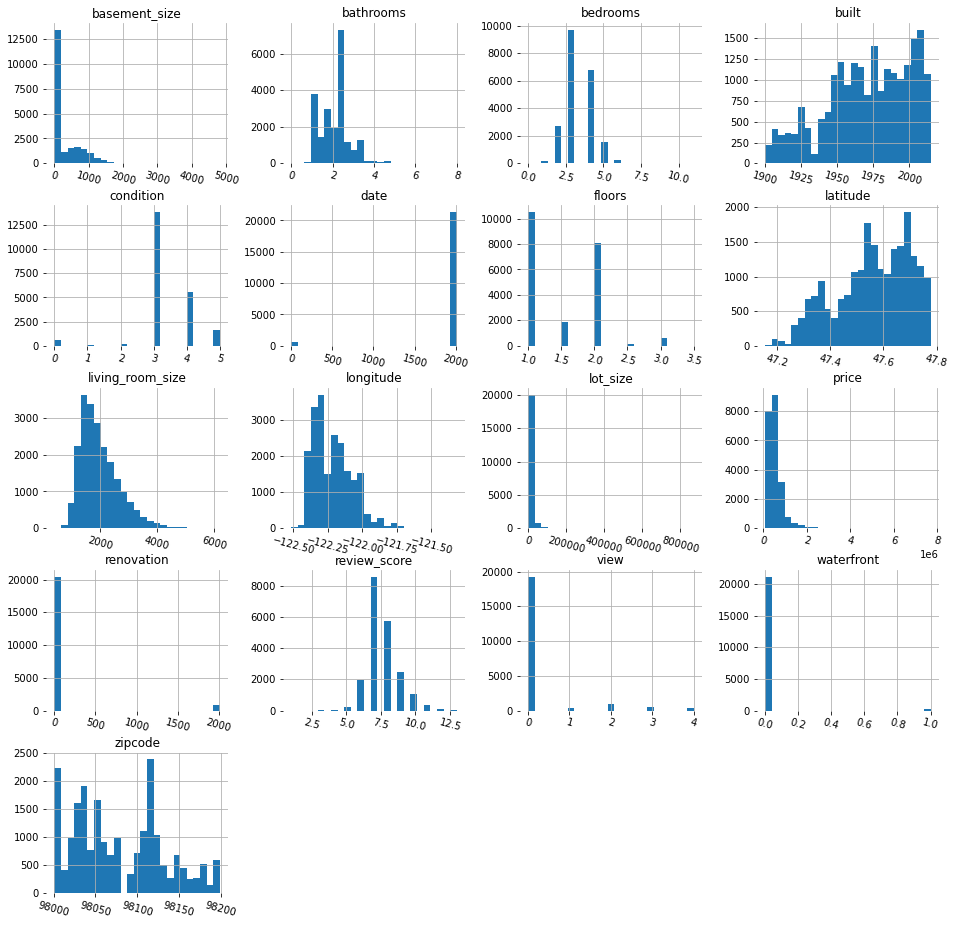

In [104]:
# We plot the histogram (count=y-axis vs feature x-axis)for all 17 features to understand how they are distributed and
# whether they are Continuous or Discrete or Outliers
features=df[['date','price', 'bedrooms', 'bathrooms', 'condition', 'floors', 'waterfront', 'view', 'review_score',
    'basement_size', 'built', 'renovation', 'zipcode',
    'latitude', 'longitude', 'living_room_size', 'lot_size']]

h = features.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

# Observation 2a)
We observe from the above Histograms that all the Features are Skewed and not normally distrbuted

In [105]:
# Year or Temporal feature (as per Observation d) above)
year_feature = ['date','built','renovation']

# Numerical variables are of 2 types : Continous variable and Discrete Variables . We define discrete feature to
# have less than 25 unique values , otherwise continuous feature
discrete_feature=[f for f in df.columns if len(df[f].unique())<25 and f not in 
                  year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

continuous_feature=[f for f in df.columns if len(df[f].unique())>=25 and f not in 
                  year_feature]
print("Continuous Variables Count: {}".format(len(continuous_feature)))

Discrete Variables Count: 6
Continuous Variables Count: 8


In [106]:
# discrete features
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'review_score']

In [107]:
# continuous features
continuous_feature

['price',
 'bathrooms',
 'basement_size',
 'zipcode',
 'latitude',
 'longitude',
 'living_room_size',
 'lot_size']

Text(0.5, 1.0, 'Median House Price vs Date of Sale')

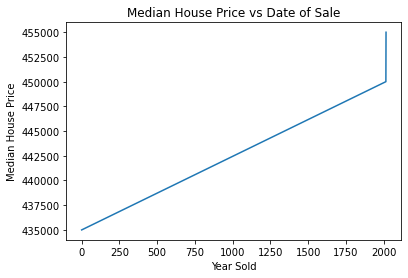

In [108]:
## Lets analyze the Temporal Date-time or Year Variables
## We will check whether there is a relation between year the house is sold vs House Price

df.groupby('date')['price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("Median House Price vs Date of Sale")

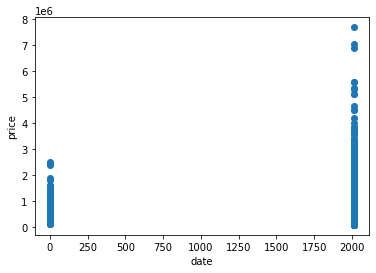

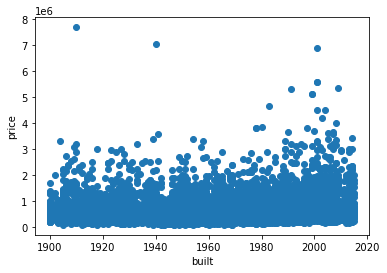

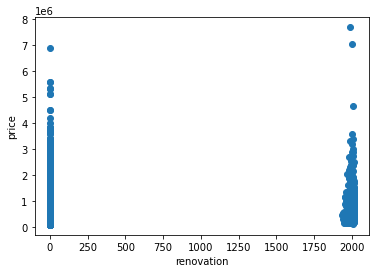

In [109]:
#we plot the Scatter Plot of House Price(price) vs Year or Temporal variable/feature 
for feature in year_feature:
    data=df.copy()
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

# Observation 2b)
We observe that 'renovation' has a lot of Zeros and Outliers , so for missing values it needs to be populated my median. And to reduce the number features from 3 to 2 we need to do feature engineering in 3. (next section)

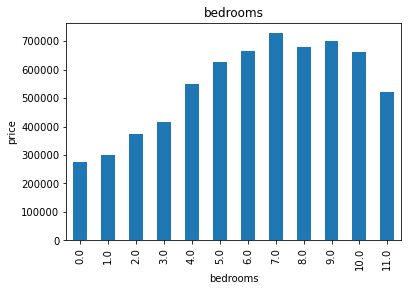

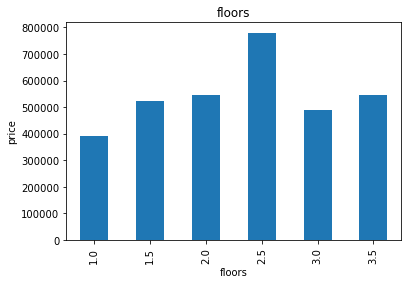

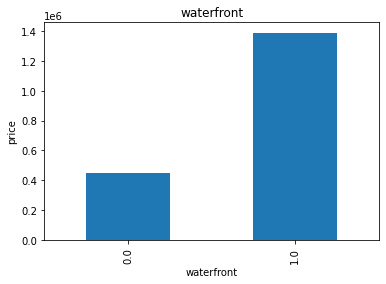

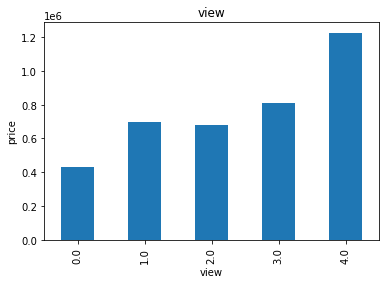

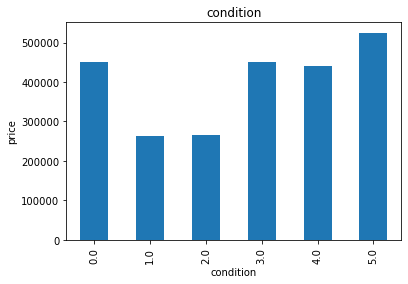

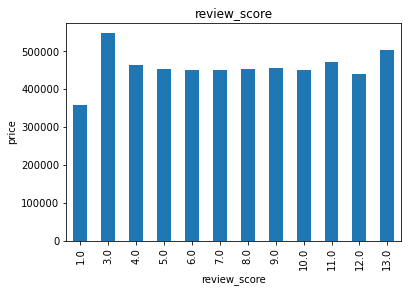

In [110]:
#we plot the median House Price(price) vs Dicrete features variable 
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Observation 2c)
We observe from above plots , a Linear Relationship between median price and Discrete Features except waterfront , view, condition  which have a lot of zero outliers

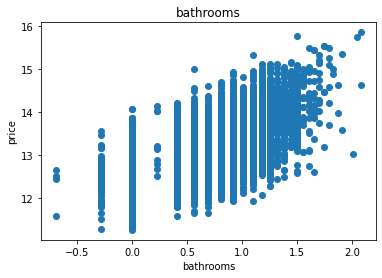

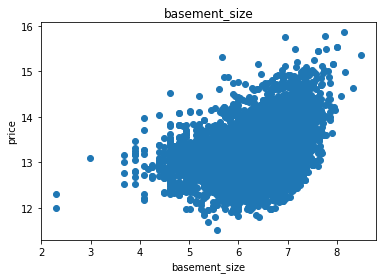

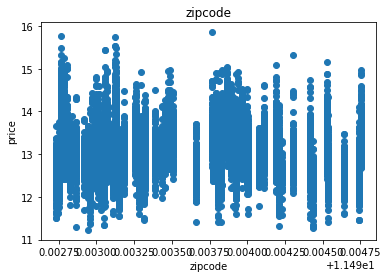

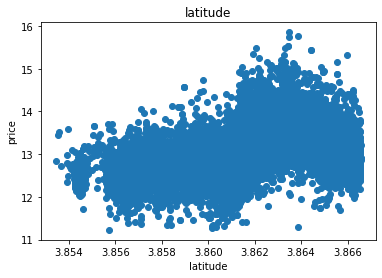

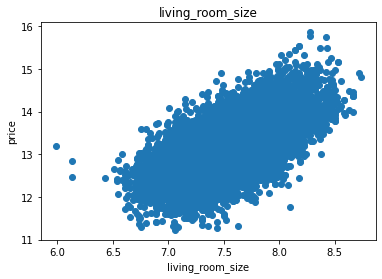

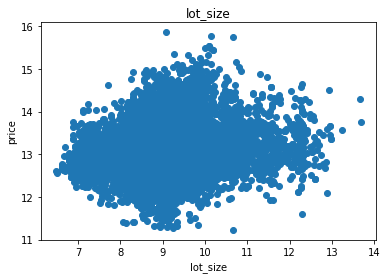

In [111]:
#we plot the Scatter Plot of House Price(price) vs Continuous Features (except Longitude)
continuous_feature1 = continuous_feature
#remove price from continuous feature
continuous_feature1.remove('price')
#remove longitude from continuous feature as it has negative value and throwing an error
continuous_feature1.remove('longitude')

for feature in continuous_feature1:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['price']=np.log(data['price'])
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

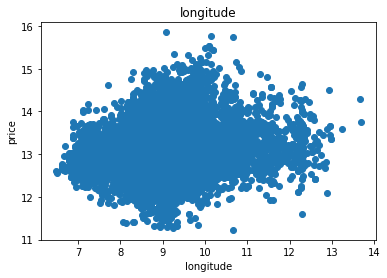

In [112]:
#taking the scatter plot of 'price' vs 'longitude'
data=df.copy()
data['longitude']=np.log(data[feature].abs())
data['price']=np.log(data['price'])
plt.scatter(data['longitude'],data['price'])
plt.xlabel('longitude')
plt.ylabel('price')
plt.title('longitude')
plt.show()

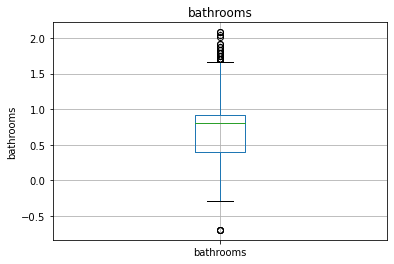

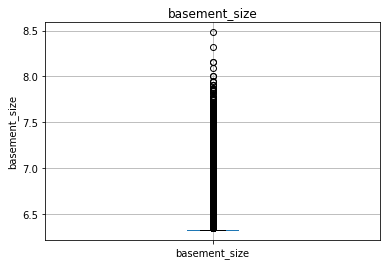

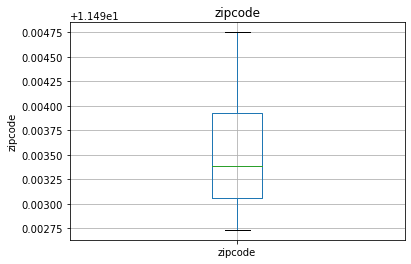

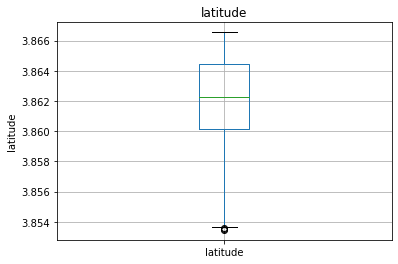

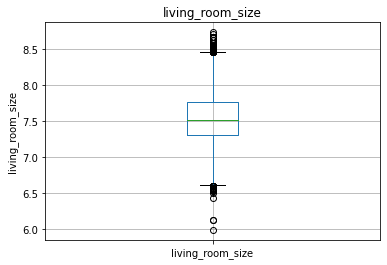

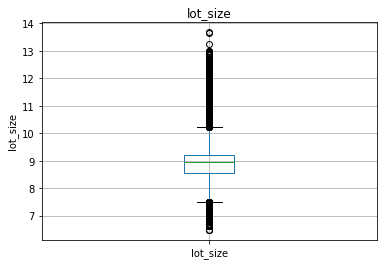

In [113]:
#we plot the Boxplot of all continuous features to  see which features have outliers

for feature in continuous_feature1:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

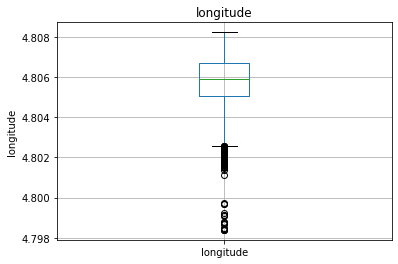

In [114]:
#taking the box plot of 'longitude'
data=df.copy()
data['longitude']=np.log(data['longitude'].abs())
data.boxplot(column='longitude')
plt.ylabel('longitude')
plt.title('longitude')
plt.show()

# Observation 2d)
We observe from series of scatterplots,boxplots above and histogram (beginning plot of all variables) of Continuous Features  that there is essentially a Linear Relationship between price and Continuous Features with many outliers

# 3. Missing Values and Feature Engineering

In [115]:
## In Missing Values we check the percentage of nan values present in each feature (all are numerical features)

data=df.copy()
## Step 1 make the list of features which has missing values
features_with_na=[features for features in df.columns if data[features].isnull().sum()>1]
## Step 2 print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean()*100, 2),  '% missing values')

bedrooms 2.69 % missing values
bathrooms 2.6 % missing values
floors 2.82 % missing values
waterfront 2.84 % missing values
view 2.66 % missing values
review_score 5.6 % missing values
basement_size 2.55 % missing values
built 2.8 % missing values
renovation 2.66 % missing values
zipcode 2.66 % missing values
latitude 2.68 % missing values
longitude 2.63 % missing values
living_room_size 2.75 % missing values
lot_size 2.66 % missing values


In [116]:
# from Observation 2a)-d) we conclude that we will fill all the nan or null values with median
df = df.fillna(df.median())

In [117]:
## Temporal Variables (Date Time Variables) Feature Engineering as per Observation 2b)
for feature in ['built','renovation']:
    df[feature]=df['date']-df[feature]

In [118]:
#We Drop the date Column as we have already performed Feature Engineering on it 
df = df.drop('date',axis=1)

In [119]:
#display information : number of rows and columns, Column or  Feature name 
#the total memory usage, the data type of each column, and the number of non-Null elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21896 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21896 non-null  float64
 1   bedrooms          21896 non-null  float64
 2   bathrooms         21896 non-null  float64
 3   floors            21896 non-null  float64
 4   waterfront        21896 non-null  float64
 5   view              21896 non-null  float64
 6   condition         21896 non-null  float64
 7   review_score      21896 non-null  float64
 8   basement_size     21896 non-null  float64
 9   built             21896 non-null  float64
 10  renovation        21896 non-null  float64
 11  zipcode           21896 non-null  float64
 12  latitude          21896 non-null  float64
 13  longitude         21896 non-null  float64
 14  living_room_size  21896 non-null  float64
 15  lot_size          21896 non-null  float64
dtypes: float64(16)
memory usage: 2.8 MB


In [120]:
df.head(20)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,221900.00,3.00,1.00,1.00,0.00,0.00,3.00,10.00,0.00,59.00,2014.00,98178.00,47.51,-122.26,1340.00,5650.00
1,538000.00,3.00,2.25,2.00,0.00,0.00,3.00,7.00,400.00,63.00,23.00,98125.00,47.72,-122.32,1690.00,7639.00
2,180000.00,2.00,1.00,1.00,0.00,0.00,3.00,8.00,0.00,82.00,2015.00,98028.00,47.74,-122.23,2720.00,8062.00
3,604000.00,4.00,3.00,1.00,0.00,0.00,5.00,6.00,910.00,49.00,2014.00,98136.00,47.52,-122.39,1360.00,5000.00
4,510000.00,3.00,2.00,1.00,0.00,0.00,3.00,6.00,0.00,28.00,2015.00,98074.00,47.62,-122.05,1800.00,7503.00
5,1225000.00,4.00,4.50,1.00,0.00,0.00,3.00,8.00,1530.00,13.00,2014.00,98053.00,47.66,-122.00,4760.00,101930.00
6,257500.00,3.00,2.25,2.00,0.00,0.00,3.00,7.00,0.00,19.00,2014.00,98003.00,47.31,-122.33,2238.00,6819.00
7,291850.00,3.00,1.50,1.00,0.00,0.00,3.00,7.00,0.00,52.00,2015.00,98198.00,47.41,-122.31,1650.00,9711.00
8,229500.00,3.00,1.00,1.00,0.00,0.00,3.00,7.00,730.00,55.00,2015.00,98146.00,47.51,-122.34,1780.00,8113.00
9,323000.00,3.00,2.50,2.00,0.00,0.00,3.00,7.00,0.00,12.00,2015.00,98038.00,47.37,-122.03,2390.00,7570.00


# 4. Regression Algorithms to Predict

In [121]:
# train(=Independent variables) and label(=target variable) 
label = df['price']
train = df.drop(['price'],axis=1)

In [122]:
# train and test split
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.15,random_state =2)

In [123]:
# Model - Multiple Linear Regression
mlr = LinearRegression()
# Run fit fuction
mlr.fit(x_train,y_train)
#R Squared Score
mlr_score=mlr.score(x_test,y_test)
#Run Predict on test set
pred_mlr = mlr.predict(x_test)
#get explained variance (measure of Accuracy of Prediction)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [124]:
#Model - ensemble - Gradient Boosting 
gbm = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
#run fit
gbm.fit(x_train, y_train)
#R Squared Score
gbm_score = gbm.score(x_test,y_test)
#Run Predict on test set
pred_gbm = gbm.predict(x_test)
#get explained variance (measure of Accuracy of Prediction)
expl_gbm = explained_variance_score(pred_gbm,y_test)

In [125]:
# Decision Tree Algorthm
tr_regressor = DecisionTreeRegressor(random_state=0)
#run fit function
tr_regressor.fit(x_train,y_train)
#R Squared Score
decision_score=tr_regressor.score(x_test,y_test)
#Run Predict on test set
pred_tr = tr_regressor.predict(x_test)
#get explained variance (measure of Accuracy of Prediction)
expl_tr = explained_variance_score(pred_tr,y_test)

# 5. Classification Algorithm to Predict

In [126]:
#Random Forest - Classification Algorithm
rf_classifier= RandomForestRegressor(random_state=0)
#run fit function
rf_classifier.fit(x_train,y_train)
#R Squared Score
rf_score = rf_classifier.score(x_test,y_test)
#Run Predict on test set
rf_pred = rf_classifier.predict(x_test)
#get explained variance (measure of Accuracy of Prediction)
expl_rf = explained_variance_score(rf_pred,y_test)


In [127]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Gradient Boosting Method','Decision Tree','Random forest'],
                            'R-Squared Score':[mlr_score,gbm_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_gbm,expl_tr,expl_rf]
                           })
models_score.sort_values(by='R-Squared Score',ascending=False)

,Model,R-Squared Score,Explained Variance Score
1,Gradient Boosting Method,0.81,0.76
3,Random forest,0.78,0.70
2,Decision Tree,0.60,0.55
0,Multiple Linear Regression,0.57,0.19
